In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

In [ ]:
dataset = pd.read_csv('/content/Training.csv')

!pip install numba==0.56.4
!pp install -U ydata-profiling visions numba
!pip unistall ydata-profiling visions numba -y
!pip install ydata-profiling
!pip show ydata-profiling visions numba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 37.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
/bin/bash: line 1: pp: command not found
ERROR: unknown command "unistall" - maybe you meant "uninstall"
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(dataset, title='Profiling Report')
profile.to_file('Profiling_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 133/133 [00:04<00:00, 32.82it/s]
/usr/local/lib/python3.11/dist-packages/ydata_profiling/model/pandas/duplicates_pandas.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  .reset_index(name=duplicates_key)
/usr/local/lib/python3.11/dist-packages/ydata_profiling/model/pandas/duplicates_pandas.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  .reset_index(name=duplicates_key)
/usr/local/lib/python3.11/dist-packages/ydata_profiling/model/pandas/duplicates_pandas.py:41: PerformanceWarning: DataFrame is highly f

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
dataset.shape

(4920, 133)

In [ ]:
x = dataset.drop(labels=['prognosis'], axis = 1)
y = dataset['prognosis']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    dataset.drop(labels=['prognosis'], axis = 1),
    dataset['prognosis'],
    test_size = 0.3,
    random_state = 0
)

In [ ]:
x_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
3972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
607,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
587,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3264,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1653,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

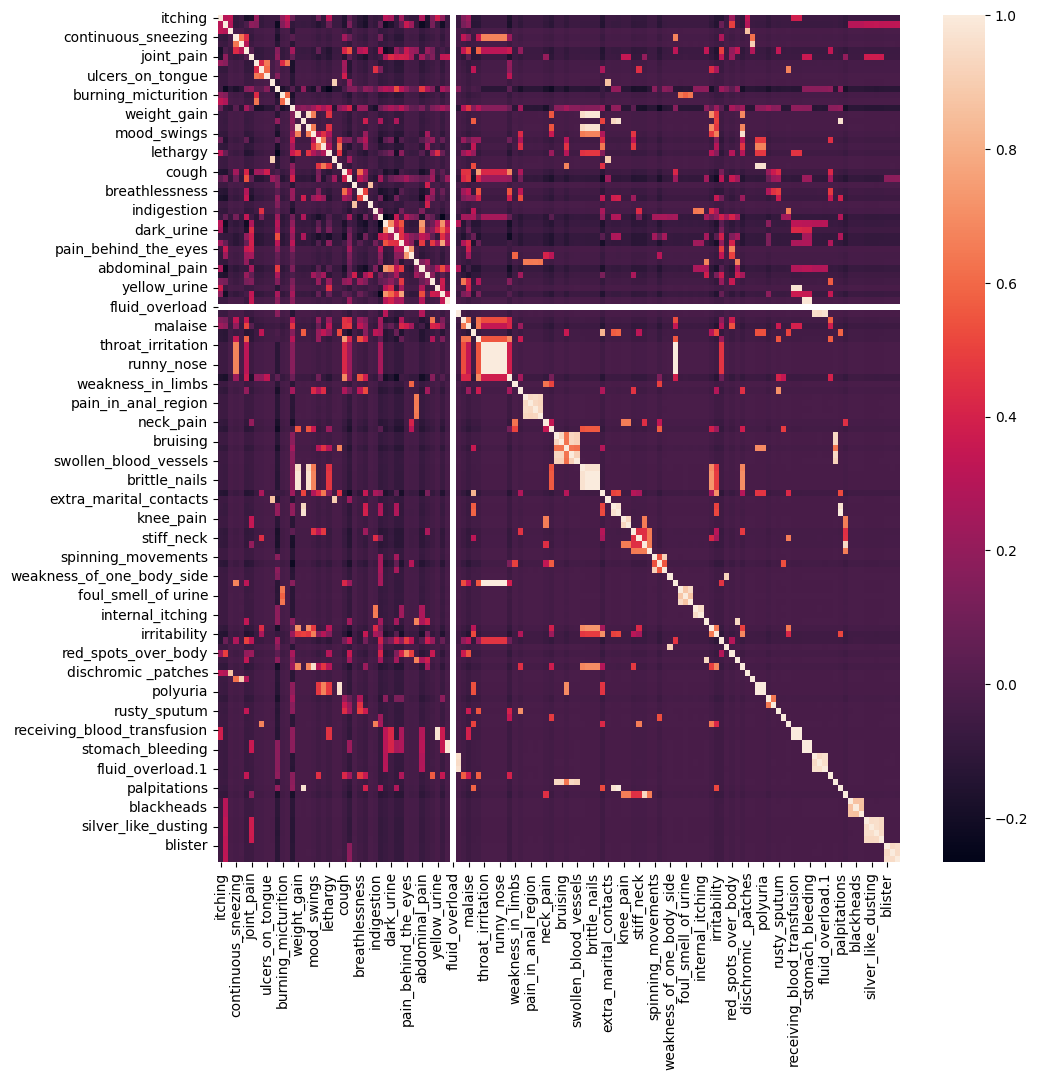

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = x_train.corr()
fig, ax  = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info  = mutual_info_classif(x_train, y_train)
mutual_info

array([0.37490418, 0.40455277, 0.08929472, 0.17016723, 0.12528111,
       0.41675402, 0.35172815, 0.18318407, 0.1457539 , 0.13194318,
       0.09327421, 0.56715013, 0.17073196, 0.09082071, 0.60193281,
       0.09929905, 0.12959623, 0.12249951, 0.19652217, 0.27838701,
       0.2042644 , 0.26352223, 0.13086311, 0.11144893, 0.32535657,
       0.52094839, 0.09963271, 0.26858732, 0.37802716, 0.10237989,
       0.17644259, 0.49635351, 0.4689213 , 0.35742443, 0.48648663,
       0.52729295, 0.13205149, 0.17899394, 0.19375574, 0.46513246,
       0.32955465, 0.25747451, 0.12797129, 0.45146892, 0.12066178,
       0.        , 0.12114905, 0.24882185, 0.37788312, 0.22477896,
       0.25356117, 0.10910482, 0.11225477, 0.08175839, 0.10539362,
       0.1199612 , 0.38324716, 0.09258196, 0.20028832, 0.10692561,
       0.09678036, 0.10230448, 0.08459011, 0.16704869, 0.24632706,
       0.12079647, 0.08553358, 0.19182981, 0.08361331, 0.11241806,
       0.10292287, 0.10942809, 0.14239089, 0.09049609, 0.32452

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

,0
fatigue,0.601933
vomiting,0.567150
loss_of_appetite,0.527293
high_fever,0.520948
headache,0.496354
...,...
belly_pain,0.082719
sinus_pressure,0.081758
visual_disturbances,0.075731
weakness_of_one_body_side,0.070229


<Axes: >

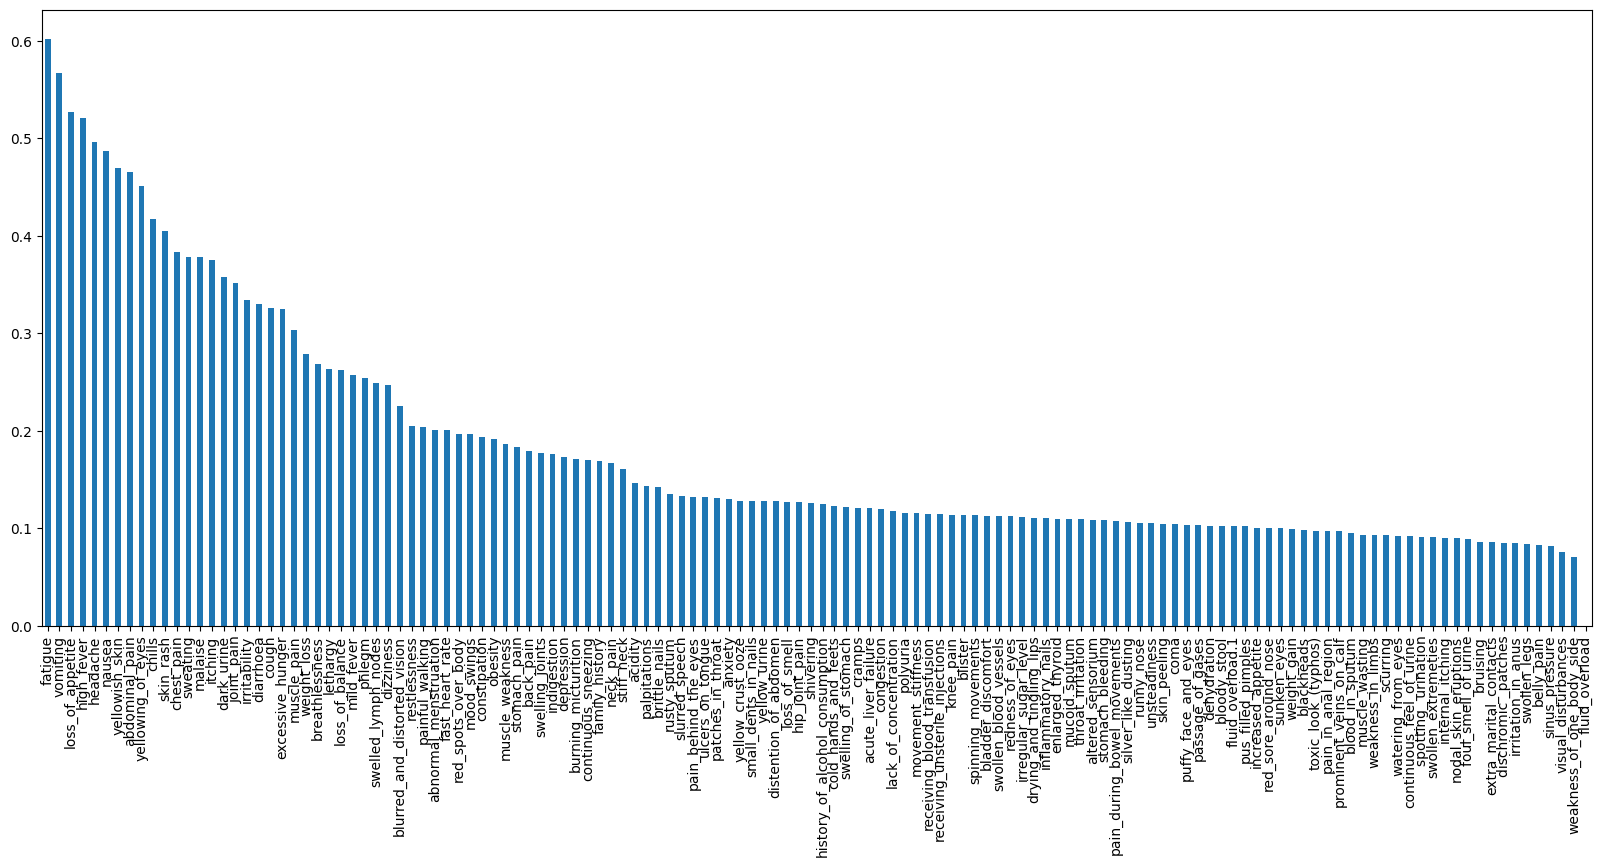

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest

sel_five_cols = SelectKBest(mutual_info_classif, k=30)
sel_five_cols.fit(x_train, y_train)

feature_scores = pd.DataFrame({
    'Feature':x_train.columns,
    'Score': sel_five_cols.scores_
})

feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores.head(30))

                         Feature     Score
14                       fatigue  0.581376
11                      vomiting  0.580615
25                    high_fever  0.540434
34                        nausea  0.519499
35              loss_of_appetite  0.514932
31                      headache  0.501605
39                abdominal_pain  0.454719
32                yellowish_skin  0.448024
43             yellowing_of_eyes  0.441822
5                         chills  0.409599
56                    chest_pain  0.404228
48                       malaise  0.401721
1                      skin_rash  0.391320
0                        itching  0.390165
6                     joint_pain  0.385527
28                      sweating  0.385419
74              excessive_hunger  0.330056
33                    dark_urine  0.329522
96                  irritability  0.327201
97                   muscle_pain  0.325968
40                     diarrhoea  0.315094
19                   weight_loss  0.300008
24         

In [ ]:
selected_features = x_train.columns[sel_five_cols.get_support()]
print(f"Top {len(selected_features)} Selected Features")
print(selected_features.tolist())
assert len(selected_features) == 30, "The number of selected features is not 25!"

Top 30 Selected Features
['itching', 'skin_rash', 'chills', 'joint_pain', 'vomiting', 'fatigue', 'weight_loss', 'lethargy', 'cough', 'high_fever', 'breathlessness', 'sweating', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellowing_of_eyes', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'chest_pain', 'excessive_hunger', 'loss_of_balance', 'irritability', 'muscle_pain', 'red_spots_over_body']


In [ ]:
x_train_selected = x_train.loc[:, sel_five_cols.get_support()]
x_test_selected = x_test.loc[:, sel_five_cols.get_support()]
x_train_selected = x_train_selected.astype(float)
x_test_selected =  x_test_selected.astype(float)
print(x_train_selected.dtypes)
print(x_test_selected.dtypes)

itching                         float64
skin_rash                       float64
chills                          float64
joint_pain                      float64
vomiting                        float64
fatigue                         float64
weight_loss                     float64
lethargy                        float64
cough                           float64
high_fever                      float64
breathlessness                  float64
sweating                        float64
headache                        float64
yellowish_skin                  float64
dark_urine                      float64
nausea                          float64
loss_of_appetite                float64
abdominal_pain                  float64
diarrhoea                       float64
mild_fever                      float64
yellowing_of_eyes               float64
swelled_lymph_nodes             float64
malaise                         float64
blurred_and_distorted_vision    float64
chest_pain                      float64


In [ ]:
import numpy as np

def to_float_numpy(array):
  if isinstance(array, np.ndarray):
    return array.astype(float)
  else:
    return array.to_numpy(dtype=float)

x_train_selected = to_float_numpy(x_train_selected)
x_test_selected = to_float_numpy(x_test_selected)


print(type(x_train_selected))
print(x_train_selected.dtype)

<class 'numpy.ndarray'>
float64


In [ ]:
from ydata_profiling import ProfileReport

# Convert x_train_selected back to a Pandas DataFrame
x_train_selected_df = pd.DataFrame(x_train_selected, columns=selected_features)

profile = ProfileReport(x_train_selected_df, title='Profiling Report') # Pass the DataFrame to ProfileReport
profile.to_file("selected_profiling_report..html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 30/30 [00:00<00:00, 50.71it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

models = {
    'SVC': SVC(kernel='linear'),
    'RandomForesrt': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB()
}

for model_name, model in models.items():

  model.fit(x_train_selected, y_train)
  predictions = model.predict(x_test_selected)

  accuracy = accuracy_score(y_test, predictions)
  print(f"{model_name} Accuracy: {accuracy}")

  cm = confusion_matrix(y_test, predictions)
  print(f"{model_name} Confusion Matrix:")
  print(np.array2string(cm, separator=', '))

  print("\n" + "="*40 + "\n")

SVC Accuracy: 0.9058265582655827
SVC Confusion Matrix:
[[32,  0,  0, ...,  0,  0,  0],
 [ 0, 30,  0, ...,  1,  0,  0],
 [ 0,  0, 37, ...,  1,  0,  0],
 ...,
 [ 0,  0,  0, ..., 36,  0,  0],
 [ 0,  0,  0, ...,  3, 35,  0],
 [ 0,  0,  0, ...,  0,  0, 38]]


RandomForesrt Accuracy: 0.9058265582655827
RandomForesrt Confusion Matrix:
[[32,  0,  0, ...,  0,  0,  0],
 [ 0, 30,  0, ...,  0,  0,  0],
 [ 0,  0, 37, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ...,  0,  0,  0],
 [ 0,  0,  0, ...,  0, 35,  0],
 [ 0,  0,  0, ...,  0,  0, 38]]


GradientBoosting Accuracy: 0.9058265582655827
GradientBoosting Confusion Matrix:
[[32,  0,  0, ...,  0,  0,  0],
 [ 0, 30,  0, ...,  0,  0,  0],
 [ 0,  0, 37, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ...,  0,  0,  0],
 [ 0,  0,  0, ...,  0, 35,  0],
 [ 0,  0,  0, ...,  0,  0, 38]]


KNeighbors Accuracy: 0.9065040650406504
KNeighbors Confusion Matrix:
[[32,  0,  0, ...,  0,  0,  0],
 [ 0, 30,  0, ...,  0,  0,  0],
 [ 0,  0, 37, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ...,

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
ypred = rf.predict(x_test)
test_accuracy = accuracy_score(y_test, ypred)
test_accuracy

1.0

In [ ]:
train_pred = rf.predict(x_train)
train_accuracy = accuracy_score(y_train, train_pred)
train_accuracy

if train_accuracy - test_accuracy > 0.1:
  print("The model is likely overfitting.")

else:
  print("The model generalizes well.")

The model generalizes well.


In [ ]:
confusion_matrix(y_train, train_pred)

array([[88,  0,  0, ...,  0,  0,  0],
       [ 0, 89,  0, ...,  0,  0,  0],
       [ 0,  0, 82, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 84,  0,  0],
       [ 0,  0,  0, ...,  0, 82,  0],
       [ 0,  0,  0, ...,  0,  0, 82]])

In [ ]:
import pickle

with open('rf_model.pkl', 'wb') as f:
  pickle.dump(rf, f)

print("RandomForest model saved as 'rf_model.pkl'")

RandomForest model saved as 'rf_model.pkl'


In [ ]:
rf = pickle.load(open('rf_model.pkl','rb'))

In [ ]:
y_test = y_test.reset_index(drop=True)
print("Actaul Disease : ", y_test[0])

Actaul Disease :  Heart attack


In [ ]:
print("predicted disease:", rf.predict(x_test.iloc[0].values.reshape(1,-1)))
print("Actaul Disease : ", y_test[0])

predicted disease: ['Heart attack']
Actaul Disease :  Heart attack


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print("predicted disease :",rf.predict(x_test.iloc[100].values.reshape(1,-1)))
print("Actual Disease :", y_test[100])

predicted disease : ['Typhoid']
Actual Disease : Typhoid


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
sym_des = pd.read_csv('/content/symtoms_df.csv')
precautions = pd.read_csv('/content/precautions_df.csv')
workout = pd.read_csv('/content/workout_df.csv')
description = pd.read_csv('/content/description.csv')
medications = pd.read_csv('/content/medications.csv')
diets = pd.read_csv('/content/diets.csv')

In [ ]:
def helper(dis):
  desc = description[description['Disease'] == predicted_disease]['Description'].astype(str)
  desc = " ".join([w for w in desc])

  pre = precautions[precautions['Disease'] == dis][['Precaution_1','Precaution_2','Precaution_3','Precaution_4']]
  pre = [col for col in pre.values]

  med = medications[medications['Disease'] == dis]['Medication'].astype(str)
  med = [med for med in med.values]

  die = diets[diets['Disease'] == dis]['Diet'].astype(str)
  die = [die for die in die.values]

  wrkout = workout[workout['disease'] == dis]['workout'].astype(str)

  return desc, pre, med, die, wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}
def get_predicted_value(patient_Symtoms):
  input_vector = np.zeros(len(symptoms_dict))
  for item in patient_Symtoms:
    input_vector[symptoms_dict[item]] = 1
    return diseases_list[SVC.predict([input_vector])[0]]

In [ ]:
import numpy as np
import pandas as pd

def get_predicted_value(patient_Symtoms):
  input_vector = [0]* len(symptoms_dict)

  for item in patient_Symtoms:
    if item in symptoms_dict:
      input_vector[symptoms_dict[item]] = 1

    else:
      print(f"warning: symptom '{item}' not recognized!")

  input_vector = np.array(input_vector).reshape(1,-1)
  predicted_index = rf.predict(input_vector)[0]

  if isinstance(predicted_index, int):
    return diseases_list[predicted_index]

  else:
    return predicted_index

symptoms = input("Enter your symptoms (comma - separated)")
user_symptoms = [s.strip() for s in symptoms.split(',')]

predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("================== Predicted Disease =================")
print(predicted_disease)
print("================== Description =======================")
print(desc)

print("================== Precautions =======================")
for i, p in enumerate(pre[0], start=1):
  print(f"{i}:{p}")

print("================== Medications =======================")
for i, m in enumerate(med, start=1):
  print(f"{i}:{m}")

print("================== Workout =======================")
for i, w in enumerate(wrkout, start=1):
  print(f"{i}:{w}")

print("================== Diet =======================")
for i, d in enumerate(die, start=1):
  print(f"{i}:{d}")

In [ ]:
print(workout.columns)  # Replace 'workout' with other DataFrame names to check
print(precautions.columns)
print(medications.columns)
print(diets.columns)
print(description.columns)

In [ ]:
print(selected_features.tolist())

# Hyperparameters Tununing

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np


x, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=2, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

x_train_selected = np.abs(x_train)
x_test_selected = np.abs(x_test)

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model_params = {
    'SVC': {
        'model': SVC(probability=True),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7],
            'subsample': [0.6, 0.8, 1.0],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'KNeighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]  # 1=Manhattan, 2=Euclidean
        }
    },
    'MultinomialNB': {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.01, 0.1, 0.5, 1.0, 5.0]
        }
    }
}

for model_name, mp in model_params.items():
    print(f"🔍 Tuning {model_name}...")

    clf = GridSearchCV(
        estimator=mp['model'],
        param_grid=mp['params'],
        cv=cv_strategy,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    clf.fit(x_train_selected, y_train)

    best_model = clf.best_estimator_
    predictions = best_model.predict(x_test_selected)

    accuracy = accuracy_score(y_test, predictions)
    print(f"✅ {model_name} Best Parameters: {clf.best_params_}")
    print(f"📊 {model_name} Accuracy: {accuracy:.4f}")

    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

    print("\n" + "="*50 + "\n")
